# Predicting the number of your customers

In this notebook, we are going to use the `pandas` library to do a simple time series analysis.

## Introduction

Suppose you have a shop. Every month you count the total number of your customers who bought from your shop. To simplify, we think of people buying one unit from your shop or nothing. 

Your customers are of two types:
* some are "returning" customers (i.e. they also bought last month) and 
* the others are new (did not buy last month)

So we will not worry about customers who, say, bought two months ago but not last month.

In this notebook, we first generate the data ourselves (so that you fully understand the structure of the data) and then we analyze this data.

## Importing libraries

We first import the libraries that we need.

In [22]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Model

We will generate the data with the following model.

Let $x_t$ denote the logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u \geq 0$ and standard deviation $\sigma_u \geq 0$ and $\rho \in [0,1]$. Hence, there is a fraction $\rho$ of previous period customers that return to buy this period and there is an inflow $u_t$ of new customers in period $t$.


**a) [1 point]** What is an advantage of defining $x_t$ as the logarithm of the number of customers? [hint: what would you need to "worry" about if $x_t$ denotes the number of customers?]


allows xt to be negative, no need to impose xt higher or equal to zero

We assume that both $\mu$ and $\rho$ are a function of the price that is charged. If you charge a high price, fewer customers will return and also the inflow of new customers will be lower.

We generate data for 24 months. The code below starts from today and generates dates with a Monthly frequency back into the past years. We define how $\rho$ and $\mu$ depend on the price $p$ that the shop charges in a period.

Finally, we create a pandas dataframe `df_customers` with this data. 

In [23]:
number_of_periods = 24
todays_date = datetime.datetime.now().date()
index = pd.date_range(end = todays_date, periods=number_of_periods, freq='M')
columns = ['log_number_of_customers']

def mu(m,p):
    return m*(1-p)

def rho(r,p):
    return r*(1-p)

sigma = 0.7

p_0 = [0.2]
p_1 = [0.6]
period_0 = 12
period_1 = number_of_periods+1-period_0
vector_p = period_0*p_0 + period_1*p_1

x_0 = 10
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    u = np.random.normal(mu(2,vector_p[t]), sigma)
    x.append(rho(0.5,vector_p[t])*x[t-1]+u)
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

**b) [3 points]** Explain what the code above does:

* what is `vector_p` and how is it generated?
* what is the type of `x`? How is this vector generated?
* show what the first couple of rows of the `df_customers` look like.

1) vector_p is a list 
2) x is also a list for each period t we draw a random number from a normal distributionand add this to rho times the value of previous x


In [24]:
df_customers.head()

,log_number_of_customers
2017-03-31,5.068170
2017-04-30,3.000167
2017-05-31,1.173365
2017-06-30,1.715199
2017-07-31,2.186583


**c) [1 point]** Calculate the number of customers in each of the periods and add the column `number_of_customers` to the dataframe `df_customers`. [hint: you may want to check numpy's `exp` function]


In [25]:
df_customers['number_of_customers'] = np.exp(df_customers['log_number_of_customers'])
df_customers.head()

,log_number_of_customers,number_of_customers
2017-03-31,5.068170,158.883370
2017-04-30,3.000167,20.088882
2017-05-31,1.173365,3.232854
2017-06-30,1.715199,5.557781
2017-07-31,2.186583,8.904735


**d) [1 point]** Calculate the average number of customers over the period of 24 months. [hint: check the datacamp course on pandas, google "python pandas average", or type `df_customers.` and the TAB key to see how to calculate an average in a dataframe]


In [26]:
df_customers['number_of_customers'].mean()

20.553345165046107

On the basis of the mean, you might conclude that you should expect around 25 customers on average (this can be different in your notebook as we are using random numbers here).

**e) [1 point]** To get an idea on whether this is realistic, also calculate the median number of customers. What do you learn from this?

In [27]:
df_customers['number_of_customers'].median()

4.813124915138233

the distribution is skeved coz mean and median are very different .some months theres a lot of customers and some theres little

To get some idea on how the number of customers varies over time, we will plot the number of customers together with two moving averages: one moving average over 3 months, the other over 6 months.

In [28]:
df_customers['MA_3'] = df_customers['number_of_customers'].rolling(window=3).mean()
df_customers['MA_6'] = df_customers['number_of_customers'].rolling(window=6).mean()

**f) [1 point]** Plot the number of customers and the moving averages defined above. [hint: you can use `matplotlib` for this, but `pandas` also allows you to plot from the dataframe directly. Typing `df_customers.` and the TAB key may help here]


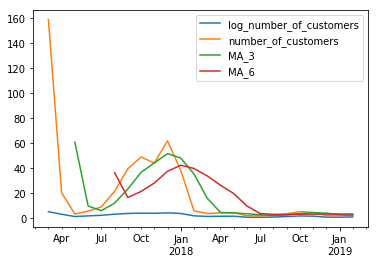

In [29]:
df_customers.plot()

Consider the first couple of rows of the dataframe `df_customers`.

----------

**g) [1 point]** Why does "NaN" mean and why do they appear? Hint: use google if you do not know what "NaN" stands for.


In [30]:
df_customers.head(10)

,log_number_of_customers,number_of_customers,MA_3,MA_6
2017-03-31,5.068170,158.883370,NaN,NaN
2017-04-30,3.000167,20.088882,NaN,NaN
2017-05-31,1.173365,3.232854,60.735035,NaN
2017-06-30,1.715199,5.557781,9.626506,NaN
2017-07-31,2.186583,8.904735,5.898457,NaN
2017-08-31,3.062570,21.382435,11.948317,36.341676
2017-09-30,3.675249,39.458499,23.248556,16.437531
2017-10-31,3.889090,48.866418,36.569117,21.233787
2017-11-30,3.785344,44.050824,44.125247,28.036782
2017-12-31,4.124036,61.808197,51.575147,37.411851


NaN is not a number

**h) [1 point]** Add a column to `df_customers` with the price per period.


In [31]:
df_customers['price'] = vector_p[1:]


Assume that your costs per sale equal 0.1.

-----------

**i) [1 point]** Add a column `profits` to the dataframe.


In [33]:
costs = 0.1
df_customers['profits'] = (df_customers['price']- costs)*df_customers['number_of_customers']

**j) [1 point]** Plot the number of customers against profit. Explain the shape of curve that you see.


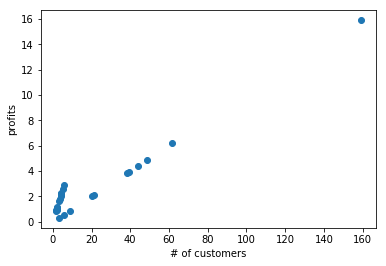

In [34]:
plt.scatter(df_customers['number_of_customers'],df_customers['profits'])
plt.xlabel('# of customers')
plt.ylabel('profits')
plt.show()